# Prototype and interactively test SSP Linking Tasks

## Tracklet maker

In [3]:
import sys, os
import lsst.daf.butler as dafButler
import lsst.solsys.pipe.makeTracklets as mt

In [4]:
repo = f'{os.environ["HOME"]}/projects/lsst_ssp/repo'
run = "u/mjuric/test-small"
butler = dafButler.Butler(repo, run=run)

In [5]:
diaSourceTable = butler.get("sspDiaSourceInputs", dict(instrument="HSC"))
visitTable     = butler.get("sspVisitInputs",     dict(instrument="HSC"))

In [13]:
config = mt.MakeTrackletsConfig()
config.imagerad = 5.0
config.minarc = 1.0

makeTracklets = mt.MakeTrackletsTask(config=config)
s = makeTracklets.run(diaSourceTable, visitTable)
(dets, tracklets, trac2det) = (s.trackletSources, s.tracklets, s.trk2det)


image 270 60611.2 36.2666 -5.38676 1.21896e+08 X05 270 271
image 271 60612.2 36.0839 -5.51198 1.20403e+08 X05 271 272
image 272 60612.2 36.0792 -5.51509 1.20364e+08 X05 272 273
find_pairs is sanity-checking indvecs
Sanity-check finished
make_tracklets is sanity-checking indvecs
Sanity-check finished
merge_pairs is sanity-checking indvecs
Sanity-check finished
Constructing tracklets, and loading output vectors
merge_pairs finished OK
loaded pairdets
loaded tracklets
loaded trk2det
C++ wrapper for make_tracklets, now fully functional
Configuration parameters for new make_tracklets:
Min. number of tracklet points: 2
Time-tolerance for matching detections on the same image: 2.31481e-05 days (2 seconds)
Maximum angular velocity: 1.5 deg/day
Minimum angular velocity: 0 deg/day
Minimum angular arc: 1 arcsec
Maximum inter-image time interval: 0.0625 days (90 minutes)
Minimum inter-image time interval: 1.15741e-05 days (0.0166667 minutes)
Image radius: 5 degrees
Maximum Great Circle Residual f

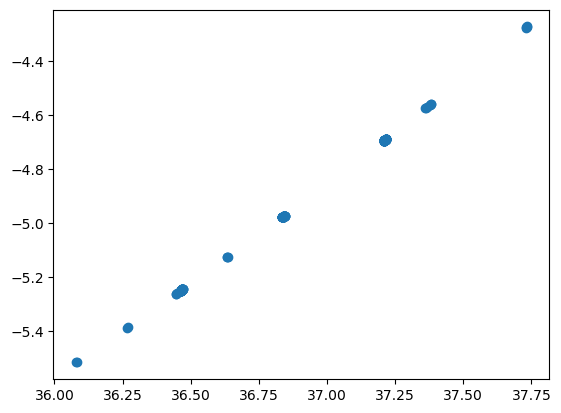

In [14]:
import matplotlib.pyplot as plt
plt.scatter(dets["RA"], dets["Dec"])